In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# select values use for this analysis
usecols = [
    "sex",
    "age_group",
    "Race and ethnicity (combined)",
    "hosp_yn",
    "icu_yn",
    "death_yn",
]

df = pd.read_csv(
    "COVID-19_Case_Surveillance_Public_Use_Data.csv", usecols=usecols, dtype=str
)
df = df.rename(
    columns={
        "Race and ethnicity (combined)": "race",
        "hosp_yn": "hosp",
        "icu_yn": "icu",
        "death_yn": "death",
    }
)
df[["sex", "age_group", "race", "hosp", "icu", "death"]] = df[
    ["sex", "age_group", "race", "hosp", "icu", "death"]
].replace({"Unknown": pd.NA, "Missing": pd.NA})

df.to_csv("cases.csv", index=False)
print(f"Saved cases.csv")

Saved cases.csv


In [4]:
df = pd.read_csv("cases.csv")

/var/folders/9l/f0vy4jv14ylcr9pvt2m5sn000000gn/T/ipykernel_42218/133602824.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cases.csv")


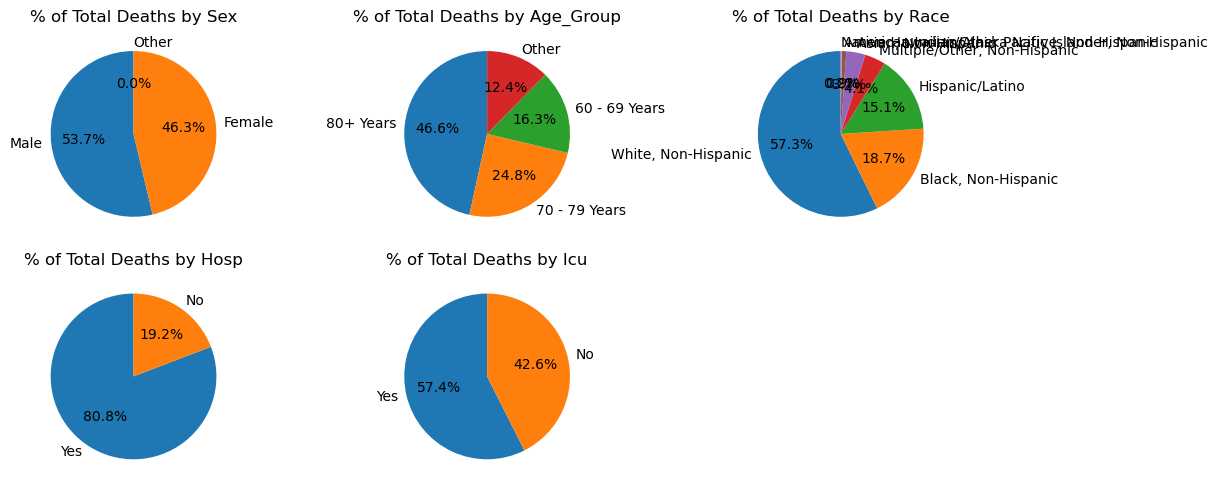

Death Distribution Summary:

SEX:
  Male: 53.70% (98,299 deaths)
  Female: 46.30% (84,743 deaths)
  Other: 0.00% (3 deaths)

AGE_GROUP:
  80+ Years: 46.56% (85,461 deaths)
  70 - 79 Years: 24.76% (45,450 deaths)
  60 - 69 Years: 16.32% (29,957 deaths)
  50 - 59 Years: 7.61% (13,973 deaths)
  40 - 49 Years: 2.94% (5,397 deaths)
  30 - 39 Years: 1.23% (2,261 deaths)
  20 - 29 Years: 0.46% (850 deaths)
  10 - 19 Years: 0.07% (135 deaths)
  0 - 9 Years: 0.04% (71 deaths)

RACE:
  White, Non-Hispanic: 57.26% (87,074 deaths)
  Black, Non-Hispanic: 18.75% (28,512 deaths)
  Hispanic/Latino: 15.09% (22,954 deaths)
  Multiple/Other, Non-Hispanic: 4.11% (6,257 deaths)
  Asian, Non-Hispanic: 3.71% (5,639 deaths)
  American Indian/Alaska Native, Non-Hispanic: 0.89% (1,348 deaths)
  Native Hawaiian/Other Pacific Islander, Non-Hispanic: 0.19% (290 deaths)

HOSP:
  Yes: 80.82% (113,901 deaths)
  No: 19.18% (27,022 deaths)

ICU:
  Yes: 57.43% (24,734 deaths)
  No: 42.57% (18,336 deaths)


In [ ]:
# Create a figure with 5 subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
axes = axes.flatten()

categorical_cols = ["sex", "age_group", "race", "hosp", "icu"]

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        if col == "age_group":
            tmp = df[["age_group", "death"]].copy()
            tmp = tmp.dropna(subset=["age_group", "death"])

            # Get top 3 age groups by death rate
            rates_by_group = (
                tmp.groupby("age_group")["death"]
                .apply(lambda x: (x == "Yes").mean())
                .sort_values(ascending=False)
            )
            top4_groups = rates_by_group.head(3).index

            tmp["age_group_top3"] = tmp["age_group"].where(
                tmp["age_group"].isin(top4_groups), other="Other"
            )

            # Calculate percentage of total deaths each category represents
            death_counts = tmp[tmp["death"] == "Yes"]["age_group_top3"].value_counts()
            total_deaths = death_counts.sum()
            death_percentages = (death_counts / total_deaths * 100).sort_values(
                ascending=False
            )
        else:
            # Calculate percentage of total deaths each category represents
            death_counts = df[df["death"] == "Yes"][col].value_counts()
            total_deaths = death_counts.sum()
            death_percentages = (death_counts / total_deaths * 100).sort_values(
                ascending=False
            )

        axes[i].pie(
            death_percentages.values,
            labels=death_percentages.index,
            autopct="%1.1f%%",
            startangle=90,
        )
        axes[i].set_title(f"% of Total Deaths by {col.title()}")

# Remove the empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

# Print summary statistics
print("Death Distribution Summary:")
print("=" * 50)
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    death_counts = df[df["death"] == "Yes"][col].value_counts()
    total_deaths = death_counts.sum()
    for category, count in death_counts.items():
        percentage = (count / total_deaths) * 100
        print(f"  {category}: {percentage:.2f}% ({count:,} deaths)")

Total cases: 8,405,079
nan: 4,530,689 cases (53.90%)
No: 3,690,813 cases (43.91%)
Yes: 183,577 cases (2.18%)


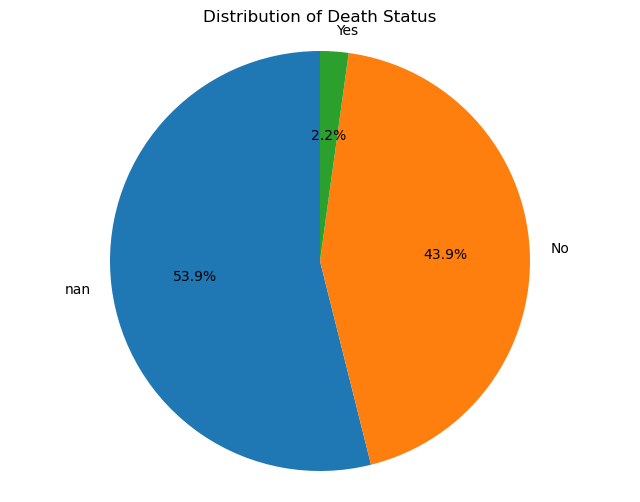

In [ ]:
# Count the values in the death field
death_counts = df["death"].value_counts(dropna=False)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    death_counts.values, labels=death_counts.index, autopct="%1.1f%%", startangle=90
)

plt.title("Distribution of Death Status")
plt.axis("equal")  # Makes the pie chart circular

# Add count information
total_cases = len(df)
print(f"Total cases: {total_cases:,}")
for status, count in death_counts.items():
    percentage = (count / total_cases) * 100
    print(f"{status}: {count:,} cases ({percentage:.2f}%)")

plt.show()